# 2D Random Walks on a lattice

## Simple Model

In a simple 2D random walk on a lattice, the walker initializes at position $x_o$. The walker can move in one of four allowable directions at each step: {up, down, left, right}. This model is discrete time, so each step takes a constant amount of time $t=n\tau$ where $t$ is time, $n$ is the step number, and $\tau$ is the time required for each step.



Text(0, 0.5, 'Position (y)')

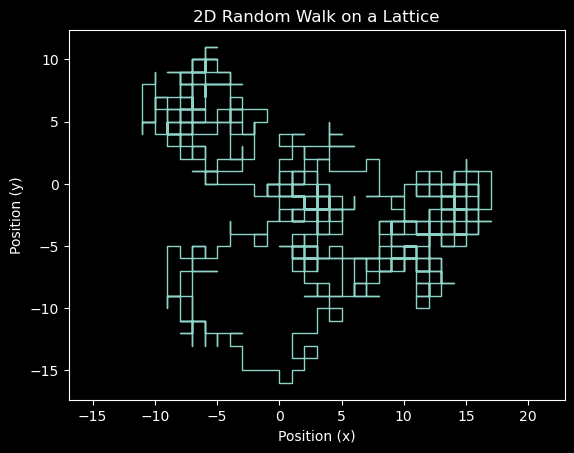

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
# Number os steps
num_steps = 1000
step_len = 1

# Initialize the positlion lists; starting at (0,0)
x_positions = [0]
y_positions = [0]

# Define the possible movement directions
moves = ['up', 'down', 'left', 'right']

# Simulate the random walk
for _ in range(num_steps):
    move=np.random.choice(moves)
    if move == 'up':
        x_positions.append(x_positions[-1])
        y_positions.append(y_positions[-1] + step_len)
    elif move == 'down':
        x_positions.append(x_positions[-1])
        y_positions.append(y_positions[-1] - step_len)
    elif move == 'left':
        x_positions.append(x_positions[-1] - step_len)
        y_positions.append(y_positions[-1])
    else:
        x_positions.append(x_positions[-1] + step_len)
        y_positions.append(y_positions[-1])

# Plot position over model time (steps)
plt.style.use('dark_background')
plt.plot(x_positions, y_positions, linewidth=1)
plt.axis('equal')
plt.title('2D Random Walk on a Lattice')
plt.xlabel('Position (x)')
plt.ylabel('Position (y)')

## Adding plot animations

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import Video

# Animated discrete 2D random walk on a lattice
import numpy as np
import matplotlib.pyplot as plt

# Parameters
# Number os steps
num_steps = 1000
step_len = 1

# Initialize the positlion lists; starting at (0,0)
x_positions = [0]
y_positions = [0]

# Define the possible movement directions
moves = ['up', 'down', 'left', 'right']

# Simulate the random walk
for _ in range(num_steps):
    move=np.random.choice(moves)
    if move == 'up':
        x_positions.append(x_positions[-1])
        y_positions.append(y_positions[-1] + step_len)
    elif move == 'down':
        x_positions.append(x_positions[-1])
        y_positions.append(y_positions[-1] - step_len)
    elif move == 'left':
        x_positions.append(x_positions[-1] - step_len)
        y_positions.append(y_positions[-1])
    else:
        x_positions.append(x_positions[-1] + step_len)
        y_positions.append(y_positions[-1])

# Plot position over model time (steps)
with plt.style.context('dark_background'):
    # Create the figure and axis to display the frames
    fig, ax=plt.subplots()

    #plt.plot(x_positions, y_positions, linewidth=1)
    plt.title('2D Random Walk on a Lattice')
    plt.xlabel('Position (x)')
    plt.ylabel('Position (y)')

    # Set the plot axis limits
    ax.set_xlim(min(x_positions) - 10, max(x_positions) + 10)
    ax.set_ylim(min(y_positions) - 10, max(y_positions) + 10)


    # Initialize a line object
    line, = ax.plot([],[],lw=1)

    # Set axis labels
    ax.set_xlabel('Position (x)')
    ax.set_ylabel('Position (y)')

    # Initialize the line object
    def init(): 
        line.set_data([],[])
        return line,

    def update(frame):
        line.set_data(x_positions[:frame], y_positions[:frame])
        return line

    ani=FuncAnimation(fig, update, frames=len(x_positions), init_func= init, blit=False, interval=10)

    ani.save('2D_Rand_Walk.mp4', writer='ffmpeg', fps=30)


video=Video('2D_Rand_Walk.mp4', embed=True)
display(video)

plt.close(fig)

## Plotting using numpy arrays rather than lists

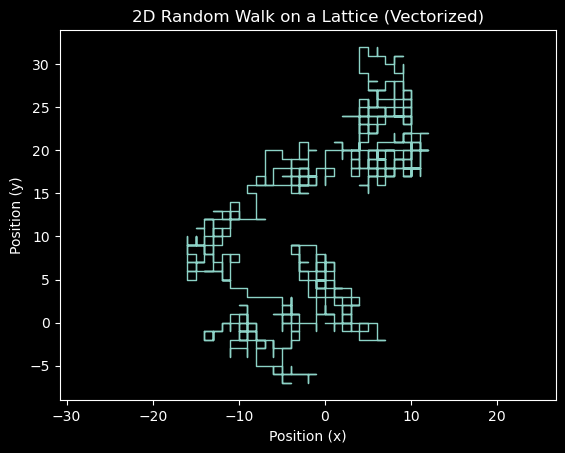

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps = 1000
step_len = 1

# Define the possible movement directions
directions = np.array([
    [0, step_len],    # up
    [0, -step_len],   # down
    [-step_len, 0],   # left
    [step_len, 0]     # right
])

# Map moves to indices
move_indices = np.random.randint(0, 4, size=num_steps)

# Get the steps using the indices
steps = directions[move_indices]

# Compute the cumulative sum to get positions
positions = np.zeros((num_steps + 1, 2), dtype=int)
positions[1:] = np.cumsum(steps, axis=0)

# Plot position over model time (steps)
plt.style.use('dark_background')
plt.plot(positions[:, 0], positions[:, 1], linewidth=1)
plt.axis('equal')
plt.title('2D Random Walk on a Lattice (Vectorized)')
plt.xlabel('Position (x)')
plt.ylabel('Position (y)')
plt.show()
